In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
!pip install -U imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
!pip show scikit-learn


Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
!unzip "/content/drive/MyDrive/Credit card/CreditCard.zip" -d "/content/data/"

Archive:  /content/drive/MyDrive/Credit card/CreditCard.zip
  inflating: /content/data/fraudTest.csv  
  inflating: /content/data/fraudTrain.csv  


In [ ]:
import pandas as pd

# Path to your files on Google Drive
path_train = '/content/data/fraudTrain.csv'
path_test = '/content/data/fraudTest.csv'
#path_fraud = '/content/drive/MyDrive/Credit card/synthetic_fraud_data_only.csv'

# Load datasets
fraudTrain = pd.read_csv(path_train)
fraudTest = pd.read_csv(path_test)
#fraud_data = pd.read_csv(path_fraud)

In [ ]:
combined_data = pd.concat([fraudTrain, fraudTest], axis=0).reset_index(drop=True)

In [ ]:
combined_data.loc[1]

Unnamed: 0                                               1
trans_date_trans_time                  2019-01-01 00:00:44
cc_num                                        630423337322
merchant                   fraud_Heller, Gutmann and Zieme
category                                       grocery_pos
amt                                                 107.23
first                                            Stephanie
last                                                  Gill
gender                                                   F
street                        43039 Riley Greens Suite 393
city                                                Orient
state                                                   WA
zip                                                  99160
lat                                                48.8878
long                                             -118.2105
city_pop                                               149
job                      Special educational needs teach

In [ ]:
combined_data.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
combined_data.shape

(1852394, 23)

In [ ]:
combined_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
list(combined_data.columns)

['Unnamed: 0',
 'trans_date_trans_time',
 'cc_num',
 'merchant',
 'category',
 'amt',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud']

In [ ]:
combined_data.drop("Unnamed: 0", inplace=True, axis=1)

In [ ]:
combined_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
## Data Pre-processing

In [ ]:
# Check for missing values
print(combined_data.isnull().sum())

# Drop rows with missing values (alternative: imputation)
combined_data.dropna(inplace=True)

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [ ]:
combined_data.shape

(1852394, 22)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize a dictionary to store label encoders for each column (useful if you need to reverse the encoding later)
label_encoders = {}

# Assuming combined_data is the DataFrame you want to process
for column in combined_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    combined_data[column] = le.fit_transform(combined_data[column])
    label_encoders[column] = le

# Displaying the first few rows of the transformed DataFrame
combined_data.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,514,8,4.97,164,18,0,576,532,...,36.0788,-81.1781,3495,372,791,80326,1325376018,36.011293,-82.048315,0
1,1,630423337322,241,4,107.23,312,161,0,439,619,...,48.8878,-118.2105,149,431,619,227462,1325376044,49.159047,-118.186462,0
2,2,38859492057661,390,0,220.11,116,386,1,610,474,...,42.1808,-112.2620,4154,308,309,1169030,1325376051,43.150704,-112.154481,0
3,3,3534093764340240,360,2,45.00,165,468,1,945,84,...,46.2306,-112.1138,1939,330,405,777909,1325376076,47.034331,-112.561071,0
4,4,375534208663984,297,9,41.96,339,153,1,422,217,...,38.4207,-79.4629,99,116,746,1186866,1325376186,38.674999,-78.632459,0


In [ ]:
import joblib

# Your trained model object (replace this with your actual model)
trained_model = le

# Path where you want to save the model file
model_filename = '/content/drive/MyDrive/Credit card/encoder.joblib'

# Save the model using joblib
joblib.dump(trained_model, model_filename)

print(f"Model saved to {model_filename}")


Model saved to /content/drive/MyDrive/Credit card/encoder.joblib


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
combined_data_scaled = scaler.fit_transform(combined_data)



# Your trained model object (replace this with your actual model)
trained_model = scaler





In [ ]:
# Path where you want to save the model file
model_filename = '/content/drive/MyDrive/Credit card/scaler.joblib'

# Save the model using joblib
joblib.dump(trained_model, model_filename)


print(f"Model saved to {model_filename}")

Model saved to /content/drive/MyDrive/Credit card/scaler.joblib


In [ ]:
combined_data['is_fraud'].value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

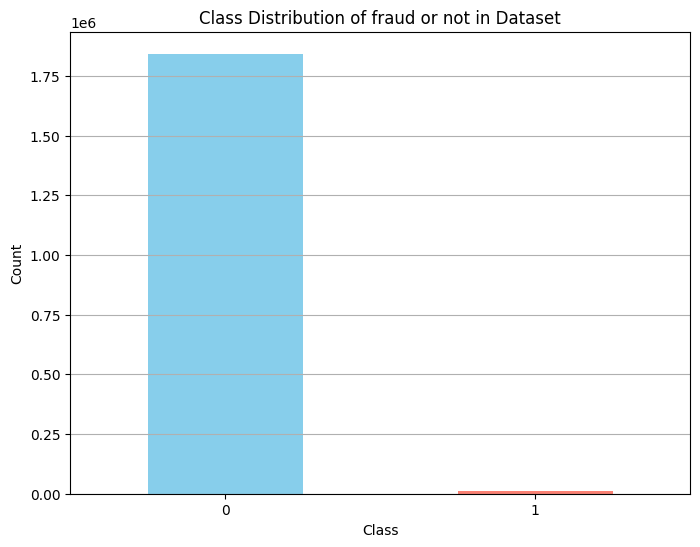

In [ ]:
import matplotlib.pyplot as plt

# Visualizing the distribution of the 'is_fraud' column in combined_data
combined_data['is_fraud'].value_counts().plot(kind='bar', figsize=(8, 6), color=['skyblue', 'salmon'])
plt.title('Class Distribution of fraud or not in Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()




In [ ]:
# Import necessary libraries and functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Splitting the data
X = combined_data.drop('is_fraud', axis=1)
y = combined_data['is_fraud']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
X_train.shape

(1296675, 21)

In [ ]:
from imblearn.over_sampling import SMOTE

# Assuming you have your feature matrix X_train and target vector y_train
# X_train should contain your feature data, and y_train should contain the target labels (0 for non-fraud, 1 for fraud)

# Calculate the number of samples to be generated (10% of the minority class)
minority_class_count = sum(y_train == 0)
desired_upsample_ratio = 0.10

# Calculate the desired number of synthetic samples
desired_upsample_count = int(desired_upsample_ratio * minority_class_count)

# Initialize the SMOTE resampler with the desired sampling ratio
smote = SMOTE(sampling_strategy=desired_upsample_ratio, random_state=42)

# Fit and apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)




ValueError: ignored

In [ ]:
X_train.shape

(2579838, 21)

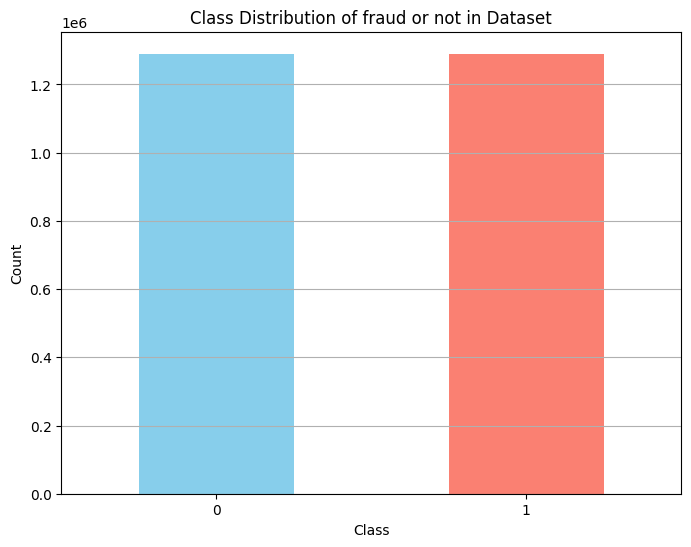

In [ ]:
import matplotlib.pyplot as plt

# Visualizing the distribution of the 'is_fraud' column in combined_data
y_train.value_counts().plot(kind='bar', figsize=(8, 6), color=['skyblue', 'salmon'])
plt.title('Class Distribution of fraud or not in Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of Logistic Regression: 0.9948
F1-Score of Logistic Regression: 0.0000
ROC-AUC Score of Logistic Regression: 0.5032

Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    552824
           1       0.00      0.00      0.00      2895

    accuracy                           0.99    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      0.99      0.99    555719



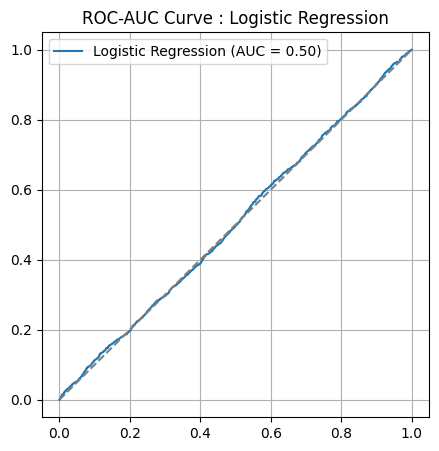

In [ ]:
# Instantiate and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Making Predictions
y_pred = log_reg.predict(X_val)
y_pred_prob = log_reg.predict_proba(X_val)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_prob)
class_report = classification_report(y_val, y_pred)

# Print the metrics
print(f"Accuracy of Logistic Regression: {accuracy:.4f}")
print(f"F1-Score of Logistic Regression: {f1:.4f}")
print(f"ROC-AUC Score of Logistic Regression: {roc_auc:.4f}")
print("\nClassification Report of Logistic Regression:")
print(class_report)

# ROC-AUC Curve plotting
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC-AUC Curve : Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


Decision Tree Accuracy: 0.9966277921035631
Decision Tree F1 Score: 0.6660727013542409
Decision Tree ROC AUC Score: 0.8220309564179146
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.69      0.65      0.67      2895

    accuracy                           1.00    555719
   macro avg       0.84      0.82      0.83    555719
weighted avg       1.00      1.00      1.00    555719



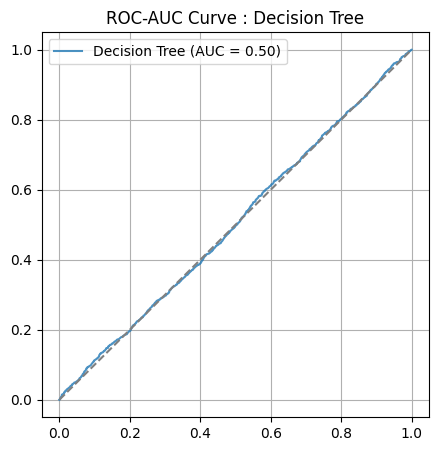

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Making Predictions
y_pred_dt = dt_model.predict(X_val)
y_pred_prob_dt = dt_model.predict_proba(X_val)[:, 1]

# Evaluate the model
accuracy_dt = accuracy_score(y_val, y_pred_dt)
f1_dt = f1_score(y_val, y_pred_dt)
roc_auc_dt = roc_auc_score(y_val, y_pred_prob_dt)
class_report_dt = classification_report(y_val, y_pred_dt)

# Print metrics
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"Decision Tree F1 Score: {f1_dt}")
print(f"Decision Tree ROC AUC Score: {roc_auc_dt}")
print("Decision Tree Classification Report:")
print(class_report_dt)

# ROC-AUC Curve plotting
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})', alpha=0.8)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC-AUC Curve : Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

Random Forest Accuracy: 0.9981447458157809
Random Forest F1 Score: 0.8026794258373205
Random Forest ROC AUC Score: 0.9917533504902709
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.90      0.72      0.80      2895

    accuracy                           1.00    555719
   macro avg       0.95      0.86      0.90    555719
weighted avg       1.00      1.00      1.00    555719



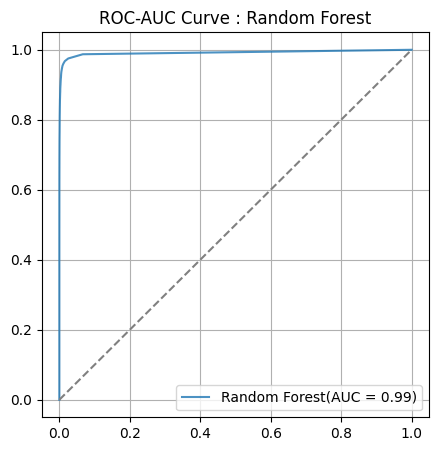

In [ ]:
# Making Predictions
y_pred_rf = rf_model.predict(X_val)
y_pred_prob_rf = rf_model.predict_proba(X_val)[:, 1]

# Evaluate the model
accuracy_rf = accuracy_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)
roc_auc_rf = roc_auc_score(y_val, y_pred_prob_rf)
class_report_rf = classification_report(y_val, y_pred_rf)

# Print metrics
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest F1 Score: {f1_rf}")
print(f"Random Forest ROC AUC Score: {roc_auc_rf}")
print("Random Forest Classification Report:")
print(class_report_rf)

# ROC-AUC Curve plotting
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_val, y_pred_prob_rf)
plt.figure(figsize=(5, 5))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest(AUC = {roc_auc_rf:.2f})', alpha=0.8)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC-AUC Curve : Random Forest')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import joblib

# Your trained model object (replace this with your actual model)
trained_model = rf_model

# Path where you want to save the model file
model_filename = '/content/drive/MyDrive/rf_credircard.joblib'

# Save the model using joblib
joblib.dump(trained_model, model_filename)

print(f"Model saved to {model_filename}")


11578/11578 [==============================] - 17s 1ms/step
FNN Accuracy:  0.9947284461467452
FNN F1 Score:  0.0
FNN ROC AUC Score:  0.4993223456935825
FNN Classification Report: 


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368526
           1       0.00      0.00      0.00      1953

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479



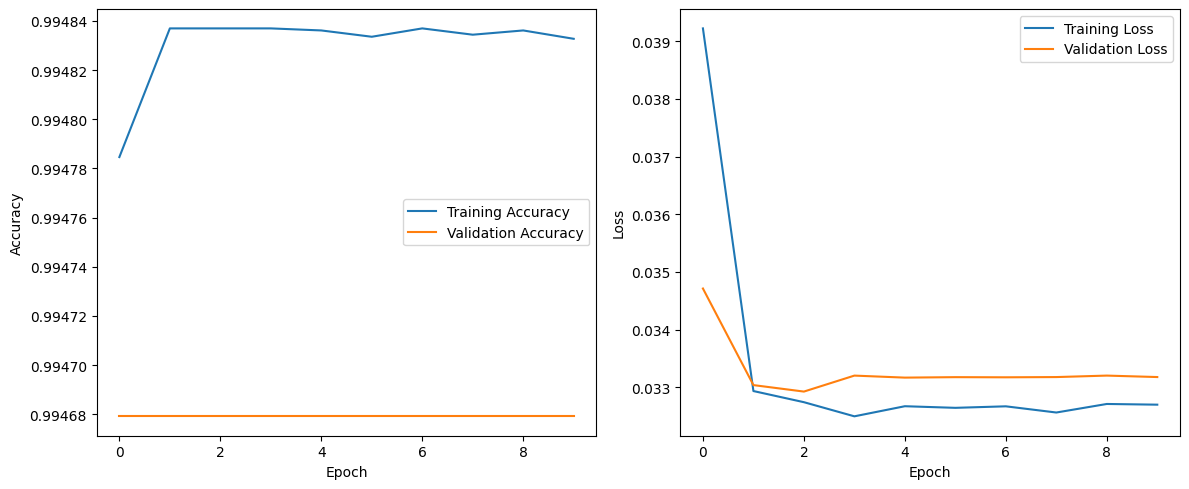

(0.9947284460067749, 0.0329175628721714)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

df = combined_data.copy()

# Define categorical and numerical columns
categorical_cols = ['merchant', 'category', 'gender', 'job']
numerical_cols = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

# Label Encoding for Categorical Features
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Min-Max Scaling for Numerical Features
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Define Features (X) and Target (y)
X = df[categorical_cols + numerical_cols]
y = df['is_fraud']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary Classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32, verbose=0)

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

# Get the model predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary output

# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred)  # Note: for roc_auc_score, use predicted probabilities, not classes

# Display Metrics
print("FNN Accuracy: ", accuracy)
print("FNN F1 Score: ", f1)
print("FNN ROC AUC Score: ", roc_auc)

# Display Classification Report
print("FNN Classification Report: ")
print(classification_report(y_test, y_pred_classes))


# Plotting Training and Validation Accuracy & Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

test_acc, test_loss


#Server

In [ ]:
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import pandas as pd
from fastapi.responses import JSONResponse
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

app = FastAPI()

# Load the Model
model = joblib.load("rf_credircard.joblib")

# If possible, load the Scaler and Encoder used during training
scaler = joblib.load("scaler.joblib")
encoder = joblib.load("encoder.joblib")


class Item(BaseModel):
    trans_date_trans_time: str
    cc_num: int
    merchant: str
    category: str
    amt: float
    first: str
    last: str
    gender: str
    street: str
    city: str
    state: str
    zip: int
    lat: float
    long: float
    city_pop: int
    job: str
    dob: str
    trans_num: str
    unix_time: int
    merch_lat: float
    merch_long: float


@app.post("/predict")
async def predict(item: Item):
    try:
        # Convert Pydantic object to dict and preprocess
        input_data = item.dict()
        input_data = preprocess_input(input_data)

        # Convert to DataFrame
        df = pd.DataFrame([input_data])

        # Preprocess the data
        processed_df = preprocess_data(df)

        # Make predictions
        predictions = model.predict(processed_df)

        # Add predictions to DataFrame and save to CSV
        df['is_fraud'] = predictions
        with open('prediction.csv', mode='a') as f:
            df.to_csv(f, header=f.tell() == 0, index=False)

        # Return predictions as JSON
        return {"prediction": predictions.tolist()}

    except Exception as e:
        return JSONResponse(content={"error": str(e)}, status_code=400)


def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    # Initialize a dictionary to store label encoders for each column (useful if you need to reverse the encoding later)
    label_encoders = {}

    # Assuming combined_data is the DataFrame you want to process
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = encoder.fit_transform(df[column])
        label_encoders[column] = encoder


    # Scale Numerical Columns
    df = scaler.transform(df)

    return df


def preprocess_input(input_data: dict) -> dict:
    # Convert 'trans_date_trans_time' to datetime and extract features
    input_data['trans_date_trans_time'] = pd.to_datetime(input_data['trans_date_trans_time'])
    input_data['hour'] = input_data['trans_date_trans_time'].hour
    input_data['day_of_week'] = input_data['trans_date_trans_time'].dayofweek
    input_data['day_of_month'] = input_data['trans_date_trans_time'].day

    # Drop the original 'trans_date_trans_time' column and any other unnecessary columns
    del input_data['trans_date_trans_time']
    del input_data['first']
    del input_data['last']
    del input_data['trans_num']

    return input_data


#Client

In [ ]:
import httpx

url = "http://127.0.0.1:8000/predict"

data = {
    "trans_date_trans_time": "2019-01-01 00:00:18",
    "cc_num": 2703186189652095,
    "merchant": "fraud_Rippin, Kub and Mann",
    "category": "misc_net",
    "amt": 4.97,
    "first": "Jennifer",
    "last": "Banks",
    "gender": "F",
    "street": "561 Perry Cove",
    "city": "SomeCity",
    "state": "SomeState",
    "zip": 12345,
    "lat": 36.0788,
    "long": -81.1781,
    "city_pop": 3495,
    "job": "Psychologist, counselling",
    "dob": "1988-03-09",
    "trans_num": "0b242abb623afc578575680df30655b9",
    "unix_time": 1325376018,
    "merch_lat": 36.011293,
    "merch_long": -82.048315
}

response = httpx.post(url, json=data)

print(response.json())
